In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
train = pd.read_csv('titanic_train.csv')

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [88]:
train.drop(['PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)

In [89]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [90]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


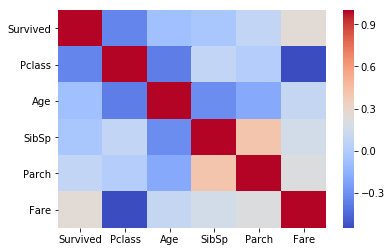

In [91]:
sns.heatmap(train.corr(), cmap='coolwarm')

In [92]:
new_sex = pd.get_dummies(train['Sex'], drop_first=True)

In [93]:
new_embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [94]:
train = pd.concat([train, new_sex, new_embarked], axis=1)

In [95]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,NaN,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,1,0,1


In [96]:
train.drop(['Sex'], inplace=True, axis=1)

In [97]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,NaN,S,1,0,1
1,1,1,38.0,1,0,71.2833,C85,C,0,0,0
2,1,3,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,1,35.0,1,0,53.1000,C123,S,0,0,1
4,0,3,35.0,0,0,8.0500,NaN,S,1,0,1


In [98]:
train.isnull()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,male,Q,S
0,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False
5,False,False,True,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,False


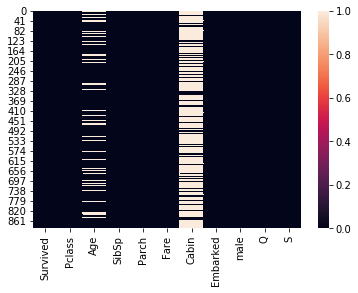

In [99]:
sns.heatmap(train.isnull())

In [100]:
train.drop(['Cabin'], inplace=True, axis=1)

In [101]:
train.drop(['Embarked'], inplace=True, axis=1)

C:\Users\gjawa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


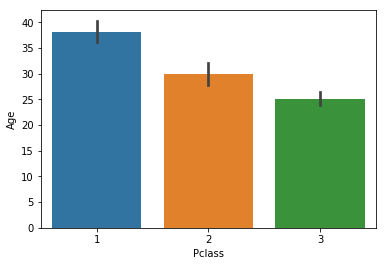

In [102]:
sns.barplot(x = 'Pclass', y = 'Age', data=train)

In [103]:
mean_class1 = train[(train['Pclass'] == 1)]['Age'].mean()

In [104]:
mean_class2 = train[(train['Pclass'] == 2)]['Age'].mean()

In [105]:
mean_class3 = train[(train['Pclass'] == 3)]['Age'].mean()

In [106]:
mean_class1

38.233440860215055

In [107]:
mean_class2

29.87763005780347

In [108]:
mean_class3

25.14061971830986

In [109]:
train.groupby('Pclass').mean() ['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [110]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else : 
            return 25
    else: 
        return age

In [111]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

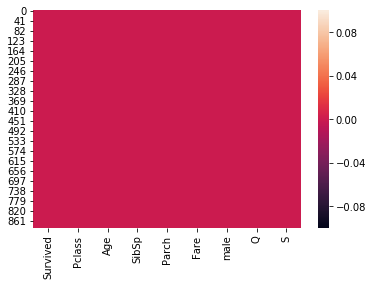

In [112]:
sns.heatmap(train.isnull())

In [113]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


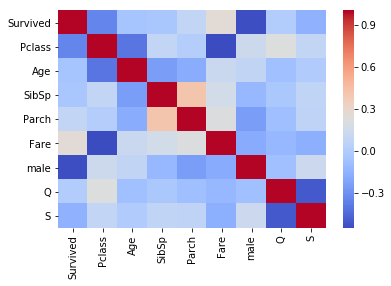

In [114]:
sns.heatmap(train.corr(), cmap='coolwarm')

In [115]:
train.drop(['SibSp', 'male'], inplace=True, axis=1)

In [116]:
train.head()

,Survived,Pclass,Age,Parch,Fare,Q,S
0,0,3,22.0,0,7.2500,0,1
1,1,1,38.0,0,71.2833,0,0
2,1,3,26.0,0,7.9250,0,1
3,1,1,35.0,0,53.1000,0,1
4,0,3,35.0,0,8.0500,0,1


In [117]:
X = train.iloc[:,1:]

In [118]:
X.head()

,Pclass,Age,Parch,Fare,Q,S
0,3,22.0,0,7.2500,0,1
1,1,38.0,0,71.2833,0,0
2,3,26.0,0,7.9250,0,1
3,1,35.0,0,53.1000,0,1
4,3,35.0,0,8.0500,0,1


In [119]:
Y = train['Survived']

In [120]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [124]:
len(Y_train)

623

In [125]:
len(Y_test)

268

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
model = LogisticRegression()

In [131]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
Y_pred = model.predict(X_test)

In [133]:
len(Y_pred)

268

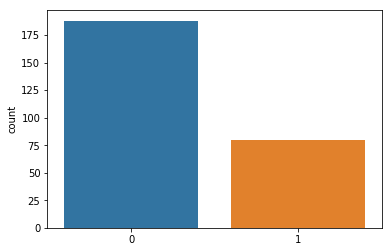

In [137]:
sns.countplot(Y_pred)

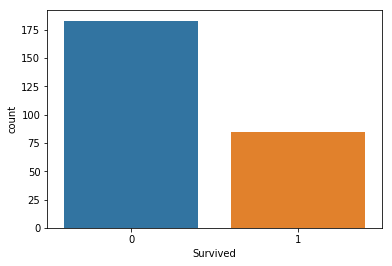

In [141]:
sns.countplot(Y_test)

C:\Users\gjawa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


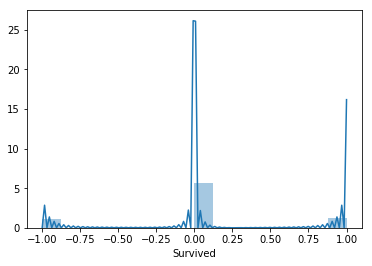

In [143]:
sns.distplot(Y_test - Y_pred)

In [144]:
from sklearn.metrics import confusion_matrix

In [145]:
confusion_matrix(Y_test, Y_pred)

array([[147,  36],
       [ 41,  44]], dtype=int64)